
## ECOPs AFRICA OCEAN COLOUR TRAINING

### M1-L2: Introduction to satellite data concepts and applications
<span style="color:brown; font-size:1.2em;font-style:italic">Satellite data search and download methods </span>
<hr style="border:2px solid rgb(30,70,125)"> </hr>


<span style="font-size:1.1em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button.   
Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Search and retrieve images from G-Portal](#3.-Search-and-retrieve-images-from-G-Portal)
- [4. Resources](#4.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

This exercise is preceeded by a presentation about [Access to Open Ocean Colour Data](https://classroom.oceanteacher.org/pluginfile.php/58990/mod_lesson/page_contents/3764/1.2Access_to_open_ocean_colour.pdf) where detailed introduction is given on how to search and retrieve data from open data archives active centres (DAACs). 

Here, we focus on data retrieval of SGLI/GCOM-C data from JAXA's [G-Portal](https://gportal.jaxa.jp/gpr/) site. You will play with a Python code to retrieve the Level 2 data. 

As for tha data obtained from the NASA's [OceanColorWeb](https://oceancolor.gsfc.nasa.gov/), the website offers an easy way to place orders and download bulk data. 

***

# 2. Library import   
[Return to the "Table of contents"](#Table-of-contents)

Start by importing require modules for this activity   
If a module throws a `ModuleNotFoundError` try installing it with the command  
- `!conda install --channel "conda-forge" module` or with  
- `!pip install module`  

If you have a requirement file containing the names of the modules you want to install, use
- `!pip install -r requirements.txt`

Remove `!` if you run the command directly in your terminal or command prompt.  
For this exercise we created a Python environment using the `environment.yml` file which contains the required module.   
You can also add additional modules to the list.

In [1]:
# importing module
from datetime import datetime

The [`datetime`](https://docs.python.org/3/library/datetime.html) module supplies classes for manipulating dates and times.   
It supportes date and time arithmetic with focus on efficient attribute extraction for output formatting and manipulation.

- **Local modules**  

Include a local library (scripts) with custom fuctions.  

We use the [`sys`](https://docs.python.org/3/library/datetime.html) module to append a directory to the list of known paths for interpreter to search.  
This allow us to import a custom function or module not in the search directories.

We also use the `Path` module from the [`pathlib`](https://docs.python.org/3/library/pathlib.html) library (an object-oriented filesystem paths) to help us easily work with relative paths and directories independently of computer configuration or OS.

In [2]:
# importing module
import sys
from pathlib import Path
  
# appending a path
cwd = Path.cwd()
sys.path.append(str(cwd.parent))

import octutils as util

# print(cwd.parent)

# 3. Search and retrieve images from G-Portal
[Return to the "Table of contents"](#Table-of-contents)

Inside `util` there is a function named `getfile`.  

Use `help` to get information on how to use the function

In [3]:
help(util.getfile)

Help on function getfile in module octutils:

getfile(sensor, dtype='OC', start_date=None, end_date=None, bbox=None, output_dir=None, manifest=None)
    Retrieves data from NASA's OceanColourWeb and JAXA's G-Portal.
    For NASA it can use http_manifest.txt or ordinary search with bbox and time interval and sensor name.
    G-Portal is searched and downloaded using bbox, sgli and temporal interval.
    
    Parameters
    ----------
    sensor: str
        sensor name, 'sgli', 'czcs', 'goci', 'meris', 'modisa', 'modist', 'octs', 'seawifs', 'sgli', 'viirsn'
    dtype: str
        data type, OC - ocean colour, SST - sea surface temperature, rrs for remote sensing reflectance
    start_date: datetime
        data search start date
    end_date: datetime
        data search end date
    bbox: tuple
        bounding box (area of interest) e.g., (lon_min, lat_min, lon_max, lat_max)
        Mozambique channel bbox (30, -30, 50, -10)
    output_dir: Path
        if output path is not specified

In [12]:
# Define data retrieval params
start = datetime(2022, 5, 25)
end = start
bbox = 30, -30, 50, -10
sensor = 'sgli'
dtype = 'OC' # OC, SST, RRS (nwlr)

files = util.getfile(start_date=start, 
                     end_date=end, 
                     bbox=bbox, 
                     sensor=sensor, 
                     dtype=dtype)
# print(f'Path: {files[0].parent}')
print('\n'.join(f.name for f in files))

GC1SG1_202205250725U16613_L2SG_IWPRQ_3000.h5
GC1SG1_202205250730D16614_L2SG_IWPRQ_3000.h5
GC1SG1_202205250734H16615_L2SG_IWPRQ_3000.h5


In [6]:
# files

<div class="alert alert-block alert-warning"/div>
    <h3>Task</h3>
  
--- 
    
Use the materials introduced in [Access to Open Ocean Colour Data](https://classroom.oceanteacher.org/pluginfile.php/58990/mod_lesson/page_contents/3764/1.2Access_to_open_ocean_colour.pdf) to find the dates with clear images in your area of interest.   
Then, run the above cell but now for SST by changing `dtype`, `bbox`, `start, and end` dates.

<div class="alert alert-block alert-info" /div>
<h2>Bonus!</h2>
 
--- 
    
We will use `h5py` and `Matplotlib` to read and display the downloaded data.   
The data in these `HDF5` files are stored as digital numbers.  
We need to scale them into geophysical values. This is achieved by applying the following expression.


- ${\it{CHLA_{[mg\ m^{-3}]} = DN \times Slope + offset}}$  

where $\it{DN}$ stands for digital number.  
Please note that L2 data comes with quality flags that are used to quality control the data.  
We will discuss about these quality flags separately.

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import numpy as np
import h5py

[Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

[h5py](https://docs.h5py.org/en/stable/) is a Python interface to the [HDF5](https://www.hdfgroup.org/solutions/hdf5/) binary data format (High-performance data management and storage suite).

In [13]:
with h5py.File(files[1], mode='r') as h5:
    dn = h5['Image_data/CHLA'][:]
    dn = np.ma.masked_where(dn == 65535, dn)
    
    attrs = dict(h5['Image_data/CHLA'].attrs)
    sds = dn * attrs.get('Slope')[0] + attrs.get('Offset')[0]
    
    print('"Image_data/CHLA" attributes\n', 
          '\n'.join(f'\t{key}: {val[0]}' for key, val in attrs.items()))

"Image_data/CHLA" attributes
 	Data_description: b'Chllorophyll-a concentration (CHLA) = DN * Slope + Offset [mg m^-3]'
	Dim0: b'Line grids'
	Dim1: b'Pixel grids'
	Error_DN: 65535
	Mask_for_statistics: 351
	Maximum_valid_DN: 65534
	Minimum_valid_DN: 0
	Offset: 0.0
	Slope: 0.0015999999595806003
	Unit: b'mg m^-3'


In the above cell we used `h5py.File` and `mode=r` to say open the `HDF5` file in reading mode.  
`h5py.File` acts like a Python [`dictionary`](https://docs.python.org/3/tutorial/datastructures.html#dictionaries), so we can always check what is stored in the file using `keys` method.  
For example,

```python
print(h5.keys())
<KeysViewHDF5 ['Geometry_data', 'Global_attributes', 'Image_data', 'Level_1_attributes', 'Processing_attributes']>
``` 
`Image_data` is one of the keys found in the file. This is what we used to read the data.  
We can also inspect the variables stored inside each of the keys using the same method, i.e., 
```python
with h5py.File(files[0], mode='r') as h5:
    for key in h5.keys():
        print(f'\n{key}\n{"="*len(key)}')
        varnames = '\n\t'.join(h5[key].keys())
        print(f'\t{varnames}')
``` 
Try and see the result.

Data visualization allows data exploration/analysis and Matplotlib makes easy things easy and hard things possible.

In Matplotlib, a simple 2D image can be created using the [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) method.

```python
plt.figure(figsize=(10, 15))
plt.imshow(sds)

use help(plt.figure) to learn more
``` 

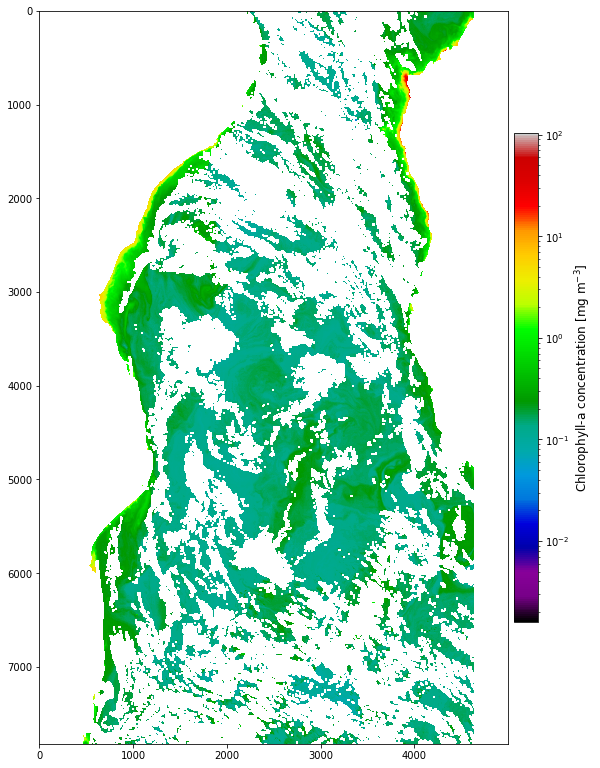

In [14]:
plt.figure(figsize=(10, 15))
m = plt.imshow(sds, cmap='nipy_spectral', norm=LogNorm())
cb = plt.colorbar(m, shrink=0.6, pad=0.01)
cb.set_label('Chlorophyll-a concentration [mg m$^{-3}$]', size=12)

<div class="alert alert-block alert-warning" /div>
    <h2>Task</h2>
    
--- 
    
Try displaying the SST image obtained in your area of interest.  
To know where the SST data is found inside the `HDF5` file, inspect the variables with the `keys` method.   
Use  
    
```python
print(h5['Image_data'].keys())
``` 
    
to get the names of variables found in `Image_data`. 
```python
print(dict(h5['Image_data/key'].attrs))
```  
Prints the attributes associated with a given variable. Replace `Key` with the actual varname.

Q: What difficulties did you encounter downloading and displaying the image?

<div class="alert alert-block alert-success"/div>
    <h2>Done!</h2>
  
--- 

#### And thank you for your attention! :) 
    We hope you are enjoying the training provided by ECOPs for ECOPs.

# 4. Resources
[Go back to the "Table of contents"](#Table-of-contents)

1. [SGLI/GCOM-C](https://global.jaxa.jp/projects/sat/gcom_c/)
2. [SGLI/GCOM-C Data Users Handbook](https://gportal.jaxa.jp/gpr/assets/mng_upload/GCOM-C/GCOM-C_SHIKISAI_Data_Users_Handbook_en.pdf)
3. [GCOM-C/SGLI Sea Surface Temperature (SST) ATBD](https://suzaku.eorc.jaxa.jp/GCOM_C/data/ATBD/ver2/V2ATBD_O1AB_SST_Kurihara_r1.pdf)
4. [h5py Quick Start Guide](https://docs.h5py.org/en/stable/quick.html)
5. [Matplotlib](https://matplotlib.org/)
5. [ECOPs Ocean Colour Training](https://github.com/Elgyii/ocean-colour-training-ecops-africa)